In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prp

In [2]:
df=pd.read_csv("D:\Open IIT DATA\Question_datasets\Train_data.csv") #reading test data
df.head(10) 

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.92700,5,0.5130,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.08840,4,0.1510,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.00000,0,0.4010,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.10800,7,0.2180,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.00000,5,0.3220,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average
5,14384,0.898,0.498,0.4420,No,0.00319,10,0.0974,-9.481,Major,01-01-1968,0.0337,109.619,0.3550,1968,2.6,low
6,954,0.259,0.620,0.7580,No,0.00132,5,0.4160,-8.183,Major,13-11-1942,0.0343,119.258,0.9120,1942,2.4,very low
7,5930,0.124,0.879,0.6280,Yes,0.00000,1,0.0661,-6.668,Minor,01-01-2005,0.2640,150.105,0.7210,2005,3.5,average
8,11900,0.149,0.697,0.1840,Yes,0.00000,2,0.0763,-23.303,Minor,01-01-1945,0.9330,133.997,0.6130,1945,1.6,very low
9,14498,0.470,0.587,0.5660,No,0.00000,9,0.0644,-9.932,Major,01-01-1999,0.0276,76.054,0.5290,1999,7.7,high


In [12]:
df["release_date"]=pd.to_datetime(df["release_date"]) #converting str to timestamp

In [14]:
#creating new columns with encoded categorical features (mode,explicit)
le1=prp.LabelEncoder()
le2=prp.LabelEncoder()
le1.fit(df["explicit"])
le2.fit(df["mode"])
df["explicit_coded"]=le1.transform(df["explicit"])
df["mode_coded"]=le2.transform(df["mode"])

In [16]:
#encoding the target variable (popularity)

def encoder(row): # function to encode popularity
    if row["popularity"]=="very low":
        return 0
    if row["popularity"]=="low":
        return 1
    if row["popularity"]=="average":
        return 2
    if row["popularity"]=="high":
        return 3
    if row["popularity"]=="very high":
        return 4

df["popularity_code"]=df.apply(lambda row : encoder(row),axis=1) #creating new column for coded popularity

In [18]:
#calculating covariences
covar=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id"
    if not filt :
        covar.append(df[i].cov(df["popularity_code"]))
colms=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id"
    if not filt :
        colms.append(i)
covariences = pd.DataFrame({'Features':colms,'Covarience_wrt_popularity':covar}) # covarience dataframe

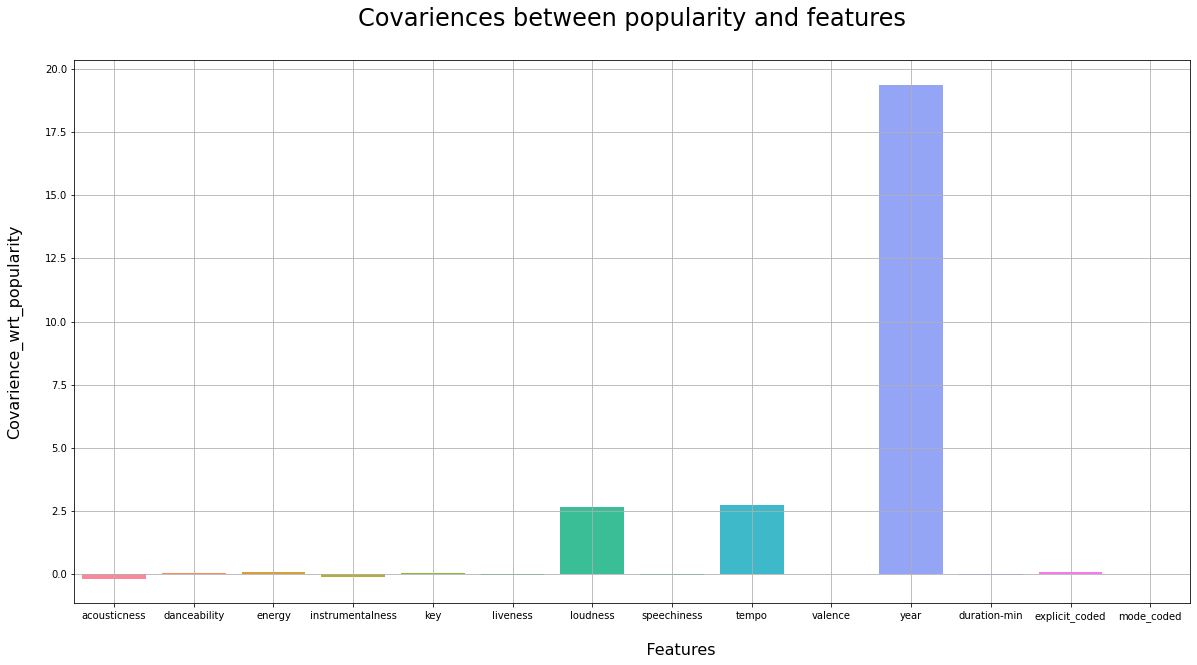

In [41]:
#plotting covariences
fg,axs=plt.subplots(figsize=(20,10))
sns.barplot(ax=axs,x='Features',y='Covarience_wrt_popularity',data=covariences,saturation=1)
axs.set_xlabel('''
                   Features''' , size=16)
axs.set_ylabel('''Covarience_wrt_popularity
                                           ''', size=16)
axs.set_title('''Covariences between popularity and features
                                                             ''',size=24)
plt.grid(True)
plt.savefig("D:\Open IIT DATA\Diagrams\covariences.png") #saving the file